In [1]:
import importlib,sys,local_utils
from local_utils import *

# Lien avec la suite de Fibonacci et les nombres de Lucas

## Notations et définition

On pourra consulter par exemple
- https://fr.wikipedia.org/wiki/Suite_de_Fibonacci
- https://fr.wikipedia.org/wiki/Nombre_de_Lucas

Les nombres de Fibonacci sont les termes de la suite $F_n$ définie par $F_0=0$, $F_1=1$, et $F_n=F_{n-1}+F_{n-2}$.

Ils sont liés aux coefficients binomiaux par la relation :
$$F_{n}=\binom{n-1}{0}+\binom{n-2}{1}+\cdots+$$

C'est à dire la somme des termes du triangle de Pascal lorsque l'on suit les coéfficients sur des lignes perpendiculaires à la diagonale principale.

In [2]:
A=triangle_pascal_gauche(N=7)
print(A)

[[1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [1 2 1 0 0 0 0]
 [1 3 3 1 0 0 0]
 [1 4 6 4 1 0 0]
 [1 5 10 10 5 1 0]
 [1 6 15 20 15 6 1]]


$F_1=\binom{0}{0}=1$

$F_2=\binom{1}{0}=1$

$F_3=\binom{2}{0}+\binom{1}{1}=1+1$

$F_4=\binom{3}{0}+\binom{2}{1}=1+2=3$

$F_5=\binom{4}{0}+\binom{3}{1}+\binom{2}{2}=1+3+1=5$

$\cdots$

De manière générale, on peut écrire que 

$$F_n=\sum_{k=0}^{\infty}\binom{n-1-k}{k}$$ 
en remarquant que dès que $k$ est supérieur $n-1-k$ alors $\binom{n-1-k}{k}=0$.

Cela permet d'écrire:
- si $n(=2q+1)$ est impair, il y a $q+1$ termes non nuls dans l'expression de $F_{2q+1}$,

$$F_{n=2q+1}=\sum_{k=0}^{q}\binom{n-1-k}{k}=\sum_{k=0}^{q}\binom{2q-k}{k}=\sum_{l=0}^{q}\binom{q+l}{q-l}$$

- si $n(=2q)$ est pair, il $q$ termes non nuls dans l'expression de $F_{2q}$,

$$F_{n=2q}=\sum_{k=0}^{q-1}\binom{n-1-k}{k}=\sum_{k=0}^{q-1}\binom{2q-1-k}{k}=\sum_{l=0}^{q-1}\binom{q+l}{q-l-1}$$

Les nombres de Lucas sont les termes de la suite définie par $L_0=2$, $L_1=1$ et $L_n=L_{n-1}+L_{n}$. 

Ils sont reliés aux nombres de la suite de Fibonacci par plusieurs relations. 

Nous ne mentionnons ici que l'une d'entre elles que nous utiliserons par la suite:

$$L_n=F_{n+1}+F_{n-1}$$



## Lien avec le damier de Pascal

On représente le damier de Pascal pour $N=7$ pour illustrer le propos à suivre.

[[2 7 16 21 16 7 2]
 [7 2 7 13 14 10 7]
 [16 7 2 7 12 14 16]
 [21 13 7 2 7 13 21]
 [16 14 12 7 2 7 16]
 [7 10 14 13 7 2 7]
 [2 7 16 21 16 7 2]]


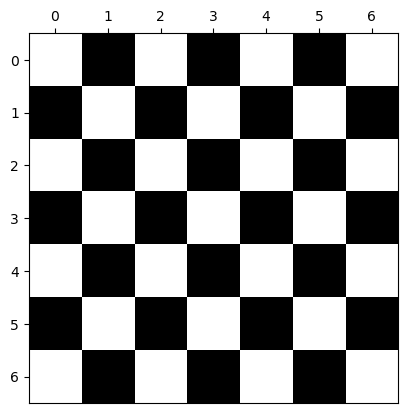

In [3]:
N=7
S=damier_pascal_S(N)
print(S)
AffichageDamierPascal(N)

Pour $N$ premier, le damier de Pascal est régulier. 

Les lignes perpendiculaires à la diagonale principale sont définies par $i-j\not\equiv 0[N]$ et $i+j=m$. En raison de la symétrie, on se limite à la partie inférieure gauche du damier, en ajoutant la contrainte $j\leq i$.

On note $D_2$ le sous ensemble des $(i,j)$ vérifiant les conditions précédentes (dépendant donc $N$ et de $m$, avec $0\leq m\leq 2N-2$). 

On note $$\zeta_{m}=\sum_{(i,j)~\in~D_2}S_{i,j}$$

Par définition, $S_{i,j}=\binom{i}{j}+\binom{N-1-j}{N-1-i}$. 

Pour $m\leq N-1$, on remarque que le premier terme de la suite est exactement la définition de $F_{m+1}$.


## Propriété I

Si $N$ est premier, alors $$L_N\equiv 1[N]$$

La réciproque n'est pas vraie.

Cette propriété des nombres de Lucas est connue (voir la page wikipedia correspondante pour une démonstration). 

Le théorème du damier de Pascal permet de la démontrer également, en calculant l'expression du terme $\zeta_{m=N-2}$

**Démonstration**: 

$N$ est un nombre premier strictement suprérieur à 2. $N$ est donc impair et $m=N-2$ également.

On note $q=(N-1)/2$ (qui est bien un entier puisque $N$ est impair). 

$$
\begin{eqnarray}
\zeta_{N-2}&=&\sum_{(i,j)\in D_2}S_{i,j}\\
          &=&F_{m+1}+\sum_{i,j|m=N-2}\binom{N-1-j}{N-1-i}\\
\end{eqnarray}
$$

On explicite maintenant les termes de la somme, en utilisant $i=m-j=N-2-j$.

$$
\begin{eqnarray}
\sum_{i,j|m=N-2}\binom{N-1-j}{N-1-i}&=&\sum_{j=0}^{q-1}\binom{N-1-j}{N-1-i}\\
          &=&\sum_{j=0}^{q-1}\binom{N-1-j}{N-1-(N-2-j)}\\
          &=&\sum_{j=0}^{q-1}\binom{N-1-j}{j+1}\\
          &=&\sum_{j=0}^{q-1}\binom{2q-j}{j+1}\\
\end{eqnarray}
$$

On fait le changement de variable $l=q-j$, pour obtenir:

$$
\begin{eqnarray}
\sum_{i,j}\binom{N-1-j}{N-1-i}&=&\sum_{l=1}^{q}\binom{2q-q+l}{q-l+1}\\
&=&\sum_{l=1}^{q}\binom{q+l}{q-l+1}\\
&=&\sum_{l=0}^{q-1}\binom{q+l+1}{q-l-1+1}\\
&=&\sum_{l=0}^{q-1}\binom{(q+1)+l}{(q+1)-l-1}\\
&=&\sum_{l=0}^{(q+1)-2}\binom{(q+1)+l}{(q+1)-l-1}\\
\end{eqnarray}
$$


A l'exception du terme $l=(q+1)-1$ qui est manquant, on retrouve exactement l'expression de $F_{2q+1}=F_{N+1}$.

Le terme manquant vaut $\binom{2q+1}{0}=1$.


On peut donc poursuivre le développement de l'expression $\zeta_{N-2}$ 
(avec $m=N-2$ et $q=(N-1)/2$)

$$
\begin{eqnarray}
\zeta_{m=N-2}&=&\sum_{(i,j)\in D_2}S_{i,j}\\
          &=&F_{m+1}+\sum_{i,j|m=N-2}\binom{N-1-j}{N-1-i}\\
          &=&F_{N-1}+F_{N+1}-1\\
          &=&L_{N}-1\\
\end{eqnarray}
$$


D'après le théorème du damier de Pascal, tous les termes $S_{i,j}$ apparaissant dans $\zeta_{m=N-2}$ vérifient $S_{i,j}\equiv 0[N]$.

Et donc $$\zeta_{N-2}=L_N-1\equiv 0[N]$$

Et on arrive bien à la proposition recherchée $\Rightarrow$ **Si $N$ est premier alors $L_N\equiv 1[N]$**



### Discussion

On comprend assez bien pouquoi la réciproque n'est pas vraie. $F_{N-1} et F_{N+1}$ sont la somme de coéfficients binomiaux. $F_{N+1}$ a un terme de plus de $F_{N-1}$. Le terme manquant vaut 1. Le théorème du damier de Pascal nous permet d'expliquer qu'il existe une congruence à $0[N]$ terme à terme pour les termes dont les sommes aboutissent à $F_{N+1}$ et $F_{N-1}$. 

Pour les $N$, qui ne sont pas premiers, telque $L_N\equiv 1$, la propriété s'applique à la somme de plusieurs termes, mais n'est pas vraie terme à terme (voir exemple dans la partie *vérification numérique*).

Ces nombres sont appelés nombre pseudo-premiers de Fibonacci.

# Généralisation


Pour discuter de la généralisation de ce résultat, nous définissons la suite $G_n$  à partir des nombres de la suite de Fibonacci et des coefficients binomiaux de la dernière ligne du triangle de Pascal $\binom{N}{.}$, de sorte que le terme $G_{N-k}$ soit le terme associé à $F_{N-k}$. C'est à dire la somme partielle des termes composants le terme $F_N+k$ que l'on retrouve dans le triangle/damier de Pascal réduit aux lignes d'indices 0 à $N-1$. 


$G_{N+1}=F_{N-1}$ et $G_{N}=F_{N}$. 

## Propriété(s) J
On montre assez facilement que 
$$
\begin{eqnarray}
G_{N-1}&=&G_{N}+G_{N+1}-\binom{N-1}{0}&=&F_{N-1}+F_{N}-\binom{N}{0}\\
G_{N-2}&=&G_{N-1}+G_{N}-\binom{N-1}{1}-\binom{N-1}{0}&=&G_{N-1}+G_{N}-\binom{N}{1}\\
G_{N-3}&=&G_{N-2}+G_{N-1}-\binom{N-1}{2}-\binom{N-1}{1}&=&G_{N-2}+G_{N-1}-\binom{N}{2}\\
\cdots&&&&\\
G_{N-k}&=&G_{N-k+1}+G_{N-k+2}-\binom{N}{k-1}\\
\end{eqnarray}
$$

Par récurrence, on peut exprimer tous les termes $G_{N-k}$ en fonction de de $F_{N}$ et $F_{N-1}$ et montrer que pour $0\leq k \leq N-1$. 

$$G_{N-k}=F_{k+1}F_N+F_kF_{N-1}-\sum_{j=0}^{k-1}F_{k-j}\binom{N}{j}$$

mais également 

$$G_{N-k}=F_{N+k}-\sum_{j=0}^{k-1}F_{k-j}\binom{N}{j}$$

en utilisant la relation $F_pF_{q+1}+F_{p-1}Fq=F_{p+q}$.

On fait remarquer dès à présent que si $N$ est premier, alors tous les termes binomiaux apparaissant dans la somme sont $\equiv 0[N]$ à l'exception de $\binom{N}{0}=1$.


On revient à l'expression de $\zeta_m$.

On montrer facilement que pour $0\leq m \leq N-2$

$$\zeta_m=F_{m+1}+G_{m+1}$$

Pour $m=N-2$, on retrouve bien

$$
\begin{eqnarray}
\zeta_{m=N-2}&=&F_{N-1}+G_{N-1}\\
&=&F_{N-1}+F_{N+1}-F_1\binom{N}{0}\\
&=& L_N-1\\
\end{eqnarray}
$$

C'est à dire l'expression permettant de démontrer la propriété I, en utilisant le théorème du damier de Pascal pour $m=N-2$.

On peut alors généraliser à chacune des perpendiculaires à la diagonale du damier de Pascal, c'est à dire pour $N$ premier impair et $m=N-2,N-4,\cdots,1$

Pour $N\ge5$, on obtient pour $m=N-4$

$$
\begin{eqnarray}
\zeta_{N-4}&=&F_{N-3}+G_{N-3}\\
&=&F_{N-3}+F_{N+3}-\sum_{j=0}^2F_{3-j}\binom{N}{j}\\
&=&F_{N-3}+F_{N+3}-F_3\binom{N}{0}-F_2\binom{N}{1}-F_1\binom{N}{2}\\
\end{eqnarray}
$$

On utilise alors la relation suivante

$$F_{N+k}+(-1)^{k+1}F_{N-k}=F_kL_N$$

On peut noter que puisqu'on n'étudie ici qu'une ligne sur deux , le terme $(-1)^{k+1}$ sera toujours égal à 1.

**Attention à partir d'ici certains résultats sont donc dépendants du fait que $k$ est impair, mais ne sont pas forcement dépendant du fait que $N-k$ le soit ou pas.**

Et on obtient 

$$
\begin{eqnarray}
\zeta_{N-4}&=&F_3L_N-F_3\binom{N}{0}-F_2\binom{N}{1}-F_1\binom{N}{2}\\
&=&F_3L_N-2-N-N(N-1)/2\\
\end{eqnarray}
$$

et pour finir en appliquant le fait que terme à terme les $S_{i,j}$ de cette ligne sont congrues à $0[N]$.

$$\zeta_{N-4}\equiv F_3(L_N-1)[N]\equiv 0[N]$$

Cette égalité étant toujours vérifiée, puisque $L_N-1\equiv 0[N]$ d'après la démonstration précédente pour $\zeta_{N-2}$.

Cette expression se généralise pour $N$ premier impair, et les $m=N-2,N-4,\cdots,1$

$$
\begin{eqnarray}
\zeta_{N-2q}&=&F_{2q-1}L_N-\sum_{j=0}^{2q-2}F_{2q-1-j}\binom{N}{j}\\
&=&F_{2q-1}\left(L_N-1\right)-\sum_{j=1}^{2q-2}F_{2q-1-j}\binom{N}{j}\\
&\equiv&F_{2q-1}\left(L_N-1\right)[N]\\
\end{eqnarray}
$$



Pour finir, on montre ici que pour $N$ premier impair, 

$$
\begin{eqnarray}
\sum_{q=1}^{(N-1)/2}\zeta_{N-2q}&\equiv&\left(\left(L_N-1\right)\sum_{q=1}^{(N-1)/2}F_{2q-1}\right)[N]\\
&\equiv&\left(L_N-1\right)F_{N-1}[N]\\
\end{eqnarray}
$$

où on a utilisé la propriété $\sum_{i=0}^nF_{2i-1}=F_{2n}$  (propriété 11 dans https://fr.wikipedia.org/wiki/Suite_de_Fibonacci#Propri%C3%A9t%C3%A9s_de_la_suite_de_Fibonacci)

**Attention, cette propriété est dépendante de $N$ premier puisqu'on a supprimé les termes pour lesquels $\binom{N}{j}\equiv 0[N]$**

Si on prend mainenant la somme sur tous les $i,j$ telque $0\leq i \leq N-1$, $0\leq j \leq N-1$ et $j\not\equiv i[2]$ 

C'est à dire toutes les cases noires du damier de Pascal, on a une double symétrie, on obtient

$$\sum_{i,j|j\not\equiv i[2]}S_{i,j}=4\sum_{q=1}^{(N-1)/2}\zeta_{N-2q}\equiv 4(L_N-1)F_{N-1}[N] $$

### Discussion / N pair et impair

L'expression $\zeta_m$ n'est pas limités aux $m$ pairs ou impaires. On peut donc calculer la somme sur la totalité du damier de Pascal, mais il faut faire attention aux symétries et au fait que les diagonales ne doivent pas être comptées plusieurs fois.

- pour les valeurs de $m$ impair il faut compter 2 fois $\zeta_m$, 
- pour les valeurs de $m$ pair, il faut compter 2 fois $\zeta_m$ mais soustraire 1 pour ne compter qu'une fois les termes de la diagonale $S_{i,i}$
- Les m compris entre 0 et $N-2$ sont à compter deux fois
- $m=N-1$ est à compter une fois (qu'il soit pair ou impair)

On peut utiliser l'expression $\zeta_m$ lignes par lignes que $N$ soit premier ou non.

$$\zeta_{N-k}=F_{N-(k-1)}+F_{N+k-1}-\sum_{j=0}^{k-2}F_{k-1-j}\binom{N}{j}$$

Voir les sections suivantes pour un rappel des différentes expressions de $\zeta_{m=N-k}$

### Discussion / Sommes des $S_{i,j}$

On connait la somme de toutes les lignes du triangle de Pascal, et on montre que pour tout $N$, la somme des termes du damier sont données par

$$T_N=\sum_{m=0}^{N-1}\zeta_m=2(2^N-1)$$

C'est à dire simplement 2 fois la somme des $N$ premières lignes du triangle de Pascal.

Puis, avec les contraintes précédentes, afin de supprimer les rédondances précédentes sur la diagonale, on obtient pour la somme de tous les termes du damier

$$\sum_{i,j}S_{i,j}=2(T_N-N)=2\left(2^{N+1}-N-2\right)$$


## Damier de Pascal et $L_N\equiv 1[N]$

On peut noter que la somme sur la totalité des cases noires du damier ne permet pas de démontrer que si $N$ premier impair alors $L_N\equiv 1[N]$ (Propriété I si dessus). 

En effet, sauf pour $N=5$, pour lequel $F_5=5\equiv 0[N]$, $N$ premier, impose 
- $F_{N-1}\equiv 0[N]$ et $F_{N+1}\equiv 1[N]$ si $N\equiv 1[5]$ ou $N\equiv 4[5]$  
- $F_{N-1}\equiv 1[N]$ et $F_{N+1}\equiv 0[N]$ si $N\equiv 2[5]$ ou $N\equiv 3[5]$ 



La somme sur l'ensemble des termes du damier ne permet de démontrer la propriété I que pour certains nombre premier (plus précisement elle ne permet de le démontrer que pour un sous ensemble de $N$ impair). 

Par contre la somme sur la plus grande perpendiculaire ($\zeta_{N-2}$) pour tous les $N$ premier impair, permet de démontrer cette rélation.

### $L_N\equiv 1[N]$ et $N$ premier

Le théorème du damier de Pascal induit une relation forte terme à terme dans le triangle de Pascal. La démonstration du théorème du damier de Pascal repose principalement sur le fait que si $N$ est premier $\binom{N}{j}\equiv 0[N]$ sauf pour $j=0$ et $j=N$.

Cette propriété permet également d'expliquer la structure fractale du Triangle de Pascal modulo N (premier) pour les lignes d'indices supérieurs à N 

In [19]:
N=5
print("N=",N)
print()
A=triangle_pascal_gauche(3*N)
AmodN=A%N
print("Triangle 2N")
for i in range(2*N):
    for j in range(2*N):
        if j<=i:
            print(AmodN[i,j],end=" ")
    print(end="\n")
print()
print("Triangle 3N")
AmodN=A%N
for i in range(3*N):
    for j in range(3*N):
        if j<=i:
            print(AmodN[i,j],end=" ")
    print(end="\n")

N= 5

Triangle 2N
1 
1 1 
1 2 1 
1 3 3 1 
1 4 1 4 1 
1 0 0 0 0 1 
1 1 0 0 0 1 1 
1 2 1 0 0 1 2 1 
1 3 3 1 0 1 3 3 1 
1 4 1 4 1 1 4 1 4 1 

Triangle 3N
1 
1 1 
1 2 1 
1 3 3 1 
1 4 1 4 1 
1 0 0 0 0 1 
1 1 0 0 0 1 1 
1 2 1 0 0 1 2 1 
1 3 3 1 0 1 3 3 1 
1 4 1 4 1 1 4 1 4 1 
1 0 0 0 0 2 0 0 0 0 1 
1 1 0 0 0 2 2 0 0 0 1 1 
1 2 1 0 0 2 4 2 0 0 1 2 1 
1 3 3 1 0 2 1 1 2 0 1 3 3 1 
1 4 1 4 1 2 3 2 3 2 1 4 1 4 1 


A ce sujet, on pourra par exemple consulter cette référence "DES DÉCOUVERTES DANS LE TRIANGLE DE PASCAL", Gregor BERG, https://mathinfo.unistra.fr/websites/math-info/irem/Publications/L_Ouvert/o_71_9-22.pdf

Le triangle de $(N-1)\times(N-1)$ cases, composé uniquement de 0, est la conséquence directe de la ligne des $N-1$ coefficients congrus à $0[N]$, composant la ligne d'indice $N$ lorsque $N$ est premier (rappelons qu'il s'agit de la $N+1^{ème}$ ligne. 

Que la ligne des $\binom{N}{i}$ *"structure"* la suite des lignes du triangle de Pascal, n'est pas surprenant compte tenu de la formule de récurrence reliant les coefficients $\binom{i}{j}$ en fonction des $\binom{i-1}{j}$.

Le théorème du damier de Pascal, montre que la primalité de $N$ structure également les éléments non nuls, bien au délà des propriétés usuelles disant par exemple $\binom{i}{j}\not\equiv 0[N]$ pour tout $0\leq i \leq N-1$ et $j\leq i$, en imposant
$$\binom{i}{j}\equiv -\binom{N-1-j}{N-1-i}[N]~~~\text{pour tout}~i,j~~~|~~~0\leq i \leq N-1,~j\leq i~{\rm et}~j\not\equiv i[2]$$



###  $L_N\not\equiv 1[N]$  et $N=2p$ (où $p$ premier)

C'est un des cas particuliers connus pour lequel, $N$ est pair et ne peut être un nombre pseudo-premier de Fibonacci (somer, 1990), pour lesquels une démonstration spécifique permet de démontrer qu'il n'est pas possible d'avoir $L_{2p}\equiv 1[2p]$ (Porto, 1993).

Le damier de Pascal donne une explication (démonstration) assez simple


In [4]:
p=7
N=2*p
A=damier_pascal_A(N)
B=damier_pascal_B(N)
S=A+B
W=A-B

Nmod=p

print("A%p (modulo centré)")
Affiche(A%Nmod,Nmod=Nmod,Fneg=True)

print("B%p (modulo centré)")
Affiche(B%Nmod,Nmod=Nmod,Fneg=True)

A%p (modulo centré)
i= 0 |   1 
i= 1 |   1   1 
i= 2 |   1   2   1 
i= 3 |   1   3   3   1 
i= 4 |   1  -3  -1  -3   1 
i= 5 |   1  -2   3   3  -2   1 
i= 6 |   1  -1   1  -1   1  -1   1 
i= 7 |   1   0   0   0   0   0   0   1 
i= 8 |   1   1   0   0   0   0   0   1   1 
i= 9 |   1   2   1   0   0   0   0   1   2   1 
i=10 |   1   3   3   1   0   0   0   1   3   3   1 
i=11 |   1  -3  -1  -3   1   0   0   1  -3  -1  -3   1 
i=12 |   1  -2   3   3  -2   1   0   1  -2   3   3  -2   1 
i=13 |   1  -1   1  -1   1  -1   1   1  -1   1  -1   1  -1   1 

B%p (modulo centré)
i= 0 |   1 
i= 1 |  -1   1 
i= 2 |   1  -2   1 
i= 3 |  -1   3  -3   1 
i= 4 |   1   3  -1   3   1 
i= 5 |  -1  -2  -3   3   2   1 
i= 6 |   1   1   1   1   1   1   1 
i= 7 |   1   0   0   0   0   0   0   1 
i= 8 |  -1   1   0   0   0   0   0  -1   1 
i= 9 |   1  -2   1   0   0   0   0   1  -2   1 
i=10 |  -1   3  -3   1   0   0   0  -1   3  -3   1 
i=11 |   1   3  -1   3   1   0   0   1   3  -1   3   1 
i=12 |  -1  -2  -3 

On retrouve bien la structure autosimilaire, et l'existence du triangle de $0~[p]$ (voir Berg,1993).

On remarque que la symétrie entre $A$ et $B$ produit le même triangle dans le damier, pour toutes les cases de $S$ ou de $W$ concernées modulo $p$ (et pas modulo $N=2p$).

In [5]:
print("S%p (modulo centré)")
Affiche(S%Nmod,Nmod=Nmod,Fneg=True)

S%p (modulo centré)
i= 0 |   2 
i= 1 |   0   2 
i= 2 |   2   0   2 
i= 3 |   0  -1   0   2 
i= 4 |   2   0  -2   0   2 
i= 5 |   0   3   0  -1   0   2 
i= 6 |   2   0   2   0   2   0   2 
i= 7 |   2   0   0   0   0   0   0   2 
i= 8 |   0   2   0   0   0   0   0   0   2 
i= 9 |   2   0   2   0   0   0   0   2   0   2 
i=10 |   0  -1   0   2   0   0   0   0  -1   0   2 
i=11 |   2   0  -2   0   2   0   0   2   0  -2   0   2 
i=12 |   0   3   0  -1   0   2   0   0   3   0  -1   0   2 
i=13 |   2   0   2   0   2   0   2   2   0   2   0   2   0   2 



In [6]:
print("W%p (modulo centré)")
Affiche(W%Nmod,Nmod=Nmod,Fneg=True)

W%p (modulo centré)
i= 0 |   0 
i= 1 |   2   0 
i= 2 |   0  -3   0 
i= 3 |   2   0  -1   0 
i= 4 |   0   1   0   1   0 
i= 5 |   2   0  -1   0   3   0 
i= 6 |   0  -2   0  -2   0  -2   0 
i= 7 |   0   0   0   0   0   0   0   0 
i= 8 |   2   0   0   0   0   0   0   2   0 
i= 9 |   0  -3   0   0   0   0   0   0  -3   0 
i=10 |   2   0  -1   0   0   0   0   2   0  -1   0 
i=11 |   0   1   0   1   0   0   0   0   1   0   1   0 
i=12 |   2   0  -1   0   3   0   0   2   0  -1   0   3   0 
i=13 |   0  -2   0  -2   0  -2   0   0  -2   0  -2   0  -2   0 



La structure autosimilaire produit une alternance de 0 et 2 dans la première colonne modulo $p$, du damier avec $N=2p$.

Mais le damier n'est pas régulier (comment attendu) puisque $N$ n'est pas premier.

Mais on peut remarquer que $\zeta_{m=N-2}\equiv 2~[p]$, car tous les termes sont nuls sauf celui sur la diagonales (démontré par la suite).

Afin de faciliter la lecture, on represente uniquement les cases de $S~[p]$ et $W~[p]$ pour lesquelles $i+j$ est pair puis impair.

In [7]:
print(f'N={N}=2p=2x{p}')
print("S%p (modulo centré)")
Affiche(S%Nmod,Nmod=Nmod,Fneg=True,Fij="pair")
print("S%p (modulo centré)")
Affiche(S%Nmod,Nmod=Nmod,Fneg=True,Fij="impair")
print("-"*40)
print("W%p (modulo centré)")
Affiche(W%Nmod,Nmod=Nmod,Fneg=True,Fij="pair")
print("W%p (modulo centré)")
Affiche(W%Nmod,Nmod=Nmod,Fneg=True,Fij="impair")
print("-"*40)
print("S%p (modulo centré) i+j=N-2")
Affiche(S%Nmod,Nmod=Nmod,Fneg=True,Fij=N-2)


N=14=2p=2x7
S%p (modulo centré)
Fij= pair
i= 0 |   2 
i= 1 |   .   2 
i= 2 |   2   .   2 
i= 3 |   .  -1   .   2 
i= 4 |   2   .  -2   .   2 
i= 5 |   .   3   .  -1   .   2 
i= 6 |   2   .   2   .   2   .   2 
i= 7 |   .   0   .   0   .   0   .   2 
i= 8 |   0   .   0   .   0   .   0   .   2 
i= 9 |   .   0   .   0   .   0   .   2   .   2 
i=10 |   0   .   0   .   0   .   0   .  -1   .   2 
i=11 |   .   0   .   0   .   0   .   2   .  -2   .   2 
i=12 |   0   .   0   .   0   .   0   .   3   .  -1   .   2 
i=13 |   .   0   .   0   .   0   .   2   .   2   .   2   .   2 

S%p (modulo centré)
Fij= impair
i= 0 |   . 
i= 1 |   0   . 
i= 2 |   .   0   . 
i= 3 |   0   .   0   . 
i= 4 |   .   0   .   0   . 
i= 5 |   0   .   0   .   0   . 
i= 6 |   .   0   .   0   .   0   . 
i= 7 |   2   .   0   .   0   .   0   . 
i= 8 |   .   2   .   0   .   0   .   0   . 
i= 9 |   2   .   2   .   0   .   0   .   0   . 
i=10 |   .  -1   .   2   .   0   .   0   .   0   . 
i=11 |   2   .  -2   .   2   .   0   .   

Aux bords ($j=0$), pour $N=2p$ avec $p$ premier:
- $i\equiv 0~[2]$ ($i$ *pair*),
    - $S_{i,0}\equiv 2~[p]$ et $W_{i,0}\equiv 0~[p]$ si $i\leq p-1$
    - $S_{i,0}\equiv 0~[p]$ et $W_{i,0}\equiv 2~[p]$ si $i>p-1$
- $i\not\equiv 0~[2]$ ($i$ *impair*),
   - $S_{i,0}\equiv 0~[p]$ et $W_{i,0}\equiv 2~[p]$ si $i\leq p-1$
   - $S_{i,0}\equiv 2~[p]$ et $W_{i,0}\equiv 0~[p]$ si $i>p-1$

On s'intéresse aux valeurs de $S_{i,j}$ apparaissant dans la somme $\zeta_{m=i+j=N-2}=L_N-1$

A l'exception de $S_{p-1,p-1}=2$, la moitier des cases restantes sont dans le triangle de 0.


Pour les autres, rappellons que pour $3\leq i < N-1$, $ 1 \leq j \leq i-2$, et $q=i-j\ge 2$. 

$$
\begin{eqnarray}
S_{i,j}&=&S_{i-1,j-1}+\sum_{k=0}^{j-1}S_{i-2-k,j-k}+A_{q-1,0}-B_{q-1,0}\\
&=&S_{i-1,j-1}+\sum_{k=0}^{j-1}S_{i-2-k,j-k}+W_{q-1,0}
\end{eqnarray}
$$

Pour les autres cases (situées en dessous), le terme $W_{q-1,0}$ est nul ($i-j=q-1$ est impair) et les autres termes de $S$ sont situés au dessus et à gauche, et sont donc congrus à $0~[p]$.

Donc $\zeta_{m=N-2}\equiv 2[p]$ et $L_{2p}-1\equiv 2[p]$.

In [8]:
# illustration des termes entrant dans le calcul des différents termes qui ne sont pas dans le triangle des termes nuls.
p=7
N=2*p
m=N-2
S=damier_pascal_S(N)
for j in range(1,p-p//2-1):
    i=m-j
    print(f'S(i={i:2},j={j:2})%p=',S[i,j]%p, end=" | ")
    DisplaySijRecurrence(i,j,N)

S(i=11,j= 1)%p= 0 | S(11,1)=S(10,0)+S(9,1)+W(9,0)
S(i=10,j= 2)%p= 0 | S(10,2)=S(9,1)+S(8,2)+S(7,1)+W(7,0)


Mais ce qui nous intéresse ici est la valeur de $L_{2p}-1$ modulo $2p$ et non $p$.

In [9]:
Nmod=N
print("S%(N=2p) (modulo centré)")
Affiche(S%Nmod,Nmod=Nmod,Fneg=True,Fij="pair")

S%(N=2p) (modulo centré)
Fij= pair
i= 0 |   2 
i= 1 |   .   2 
i= 2 |  -5   .   2 
i= 3 |   .  -1   .   2 
i= 4 |   2   .   5   .   2 
i= 5 |   .  -4   .  -1   .   2 
i= 6 |  -5   .  -5   .  -5   .   2 
i= 7 |   .  -7   .  -7   .  -7   .   2 
i= 8 |   0   .   0   .   0   .  -7   .   2 
i= 9 |   .   0   .   0   .   0   .  -5   .   2 
i=10 |  -7   .   0   .   0   .  -7   .  -1   .   2 
i=11 |   .  -7   .   0   .   0   .  -5   .   5   .   2 
i=12 |   0   .  -7   .   0   .  -7   .  -4   .  -1   .   2 
i=13 |   .   0   .  -7   .   0   .  -5   .   2   .  -5   .   2 



On se limite à la ligne qui nous intéresse, modulo $p$, puis modulo $2p$.

In [33]:

print("N=2p=",N)
print()
m=N-2
Nmod=p
print("S m=N-2=",m,"modulo p=",p)
for j in range(N//2):
    i=m-j
    print(f'{centered_mod(S[i,j],Nmod):3} ',end=" ")
print()
print()
Nmod=N
print("S m=N-2=",m,"modulo N=",N)
for j in range(N//2):
    i=m-j
    print(f'{centered_mod(S[i,j],Nmod):3} ',end=" ")
print()


N=2p= 14

S m=N-2= 12 modulo p= 7
  0    0    0    0    0    0    2  

S m=N-2= 12 modulo N= 14
  0   -7    0    0    0   -7    2  


Tous les termes congrues à $0[p]$ sont congrus $0[2p]$ ou $-p[2p]$ (modulo centré), sauf le dernier qui est inchangé puisque $2<p$.

Leur somme également, et on obtient uniquement deux cas possibles :
$$L_{2p}-1\equiv 2[2p]~~~\text{ou}~~~L_{2p}-1\equiv -p+2[2p]$$

c'est à dire 

$$L_{2p}\equiv 3[2p]~~~\text{ou}~~~L_{2p}\equiv -p+3[2p]$$

Et on peut conclure qu'**il n'existe aucun $N=2p$ avec $p\ge 3$ premier telque $L_{N}\equiv 1$**

**Commentaire** : Comme dit précédemment, ce résultat est connu (Somer, 1990, théoreme 4). 

Sa démonstration découle de la propriété $L_{2n}=L_n^2+2(-1)^{n-1}$, qui donne pour $n=p$ nombre premier impair :

$L_{2p}=L_p^2+2\equiv 3[p]$

Ce résultat se généralise pour $N=2p^\alpha$ (Somer, 1990).

La démonstration faite à partir du théorème du damier de Pascal est différente car comme pour la démonstration $L_p\equiv 1[p]$ si $p$ est premier, elle part d'une relation vraie terme à terme pour conclure sur la propriété de la somme $L_N$.

### Nombre pseudo-premier de Fibonacci

Ce sont les entiers non premiers vérifiant $L_N\equiv 1[N]$.

Le premier est $N=705$.

Il n'y a pas de raison pour que comme pour les nombres premiers, tous les $\zeta_{m=N-2q}$ soient congrues à $0[N]$ puisque la factorisation obtenue dans ce cas, utilise la propriété $\binom{N}{k}\equiv 0[N]$.

Neanmoins, d'après les calculs précédents, **pour tout $N$**

- $\zeta_0\equiv 2[N]$ puisque $\zeta_0=S_{0,0}=2$
- $\zeta_1\equiv 0[N]$ puisque $\zeta_1=S_{1,0}=N$
- $\zeta_2=S_{2,0}+S_{1,1}=3+(N-1)(N-2)/2=F_3+G_3=2-G_2+G_1+\binom{N}{N-2}=2-(N-1)+1+\binom{N}{N-2}$
- $\zeta_{N-1}=2F_N$
- $\zeta_{N-2}=F_{N-1}+F_{N+1}-\binom{N}{0}=L_N-1$
- $\zeta_{N-3}=F_{N-2}+F_{N+2}-F_2-F_1N=F_2L_N+2F_{N-2}-N-1=L_N+2F_{N-2}-N-1$
- $\zeta_{N-4}=2L_N-2-N-N(N-1)/2=2(L_N-1)-N(2+N-1)/2=2\zeta_{N-2}-N(N+1)/2$

De ces expressions, on déduit par exemple que si $N$ est un nombre pseudo-premier **impair** alors $\zeta_{N-2}\equiv 0[N]$ d'après la propriété I, mais on a également $\zeta_{N-4}\equiv 0[N]$ car $\zeta_{N-4}=2\zeta_{N-2}-N(N+1)/2$ et puisque $N$ impair cela implique $(N+1)/2$ entier, et donc $\zeta_{N-4}[N]\equiv\zeta_{N-2}\equiv 0[N]$.

Par ailleurs, même si pour ces nombres, la somme des $S_{i,j}$ concernées est congrue à 0 modulo $N$, on peut démontrer qu'au moins un de ces termes est non nul (propriété L).

De la même manière, on démontre que si $q$ est un nombre premier, multiple de $N=Kq$, alors $S_{i,j:i+j=N-2}\equiv 0$ si $j+1\not\equiv 0~[q]$. Cela signifie par exemple qu'on peut calculer $\zeta_{m=N-2}=L_N-1$ modulo $q$ en limitant la somme aux termes telsque $j+1\equiv 0[q]$. On retrouve alors la propriété connue pour $q$ premier, énonçant alors que $L_{Kq}-1\equiv L_{K}-1~[q]$. 

## Proriété K : $\zeta_m$

On reprend ici les différentes expressions de la fonction $\zeta_{N-k}$, avec $1\leq k\leq N$

$$
\begin{eqnarray}
\zeta_{N-k}&=&F_{N-(k-1)}+G_{N-(k-1)}\\
&=&F_{N-(k-1)}+F_{N+(k-1)}-\sum_{j=0}^{k-2}\binom{N+k-2-j}{j}\\
&=&F_{N-(k-1)}+F_{N+(k-1)}-\sum_{j=0}^{k-2}F_{k-1-j}\binom{N}{j}
\end{eqnarray}
$$


La suite des termes $G_m$ peut s'écrire comme une suite d'indices croissants, donnée pour $2<m\leq N$ par

$$G_m=-G_{m-1}+G_{m-2}+\binom{N}{N+1-m}$$

avec $G_1=1$ et $G_2=N-1$.


Si on fait la somme des $\zeta_{N-k}$ pour $1\leq k\leq N$, on retrouve les propriétés reliant les nombres de Fibonacci et les nombres de Lucas, et plus particulierement la relation $F_{N+K}+(-1)^{K+1}F_{N-K}=F_KL_N$, pour $K=N-1$

$$F_{2N-1}+(-1)^{N}=F_{N-1}L_N$$



On peut vérifier par exemple que la somme suivante est bien égale à la somme des coefficients des N premières lignes du Triangle de Pascal (d'indice 0 à N-1):

$$
\begin{eqnarray}
T_N&=&F_N+\sum_{m=0}^{N-2}\zeta_{m}\\
&=&F_N+\sum_{m=1}^{N-1}F_{m}+G_{m}\\
&=&F_N+F_{N+1}-1+\sum_{m=1}^{N-1}G_{m}\\
&=&F_N+F_{N+1}-1+G_1+G_2+\sum_{m=3}^{N-1}-G_{m-1}+G_{m-2}+\binom{N}{N+1-m}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+\sum_{m=3}^{N-1}\binom{N}{N+1-m}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+\binom{N}{2}+\cdots+\binom{N}{N-2}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+2^N-\binom{N}{0}-\binom{N}{1}-\binom{N}{N-1}-\binom{N}{N}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+2^N-1-N-N-1\\
&=&F_N+F_{N+1}-1+2+N-1-G_{N-2}+2^N-2-2N\\
&=&F_N+F_{N+1}-2-G_{N-2}+2^N-N\\
&=&F_N+F_{N+1}-2-\left(G_{N-1}+G_{N}-\binom{N}{1}\right)+2^N-N\\
&=&F_N+F_{N+1}-2-\left(F_{N-1}+F_N-\binom{N}{0}+F_{N}-\binom{N}{1}\right)+2^N-N\\
&=&F_N+F_{N+1}-2-\left(F_{N-1}+F_N-1+F_{N}-N\right)+2^N-N\\
&=&F_N+F_{N+1}-1-F_{N-1}-2F_N+N+2^N-N\\
&=&F_{N+1}-1-F_{N-1}-F_N+2^N\\
&=&2^N-1\end{eqnarray}
$$

On montre également à partir de la propriété sur $G_m$ que pour $2\leq m \leq N-1$
$$
\begin{eqnarray}
\zeta_m&=&-\zeta_{m-1}+\zeta_{m-2}+2F_m+\binom{N}{N-m}\\
&=&-\zeta_{m-1}+\zeta_{m-2}+2F_m+\binom{N}{m}\\
\end{eqnarray}
$$
avec $\zeta_0=2$ et $\zeta_1=N$.

De la même manière, on montre que pour $1\leq k \leq N-2$
$$
\begin{eqnarray}
\zeta_{N-k-2}&=&\zeta_{N-k-1}+\zeta_{N-k}-2F_{N-k}-\binom{N}{k}
\end{eqnarray}
$$
avec $\zeta_{N-1}=2F_N$ et $\zeta_{N-2}=L_N-1$.


On peut remarquer que si on aditionne $\zeta_m$ et $\zeta_{N-m-2}$, les coefficients binomiaux s'éliminent. 

Si on pose $N=2q$ ($N$ pair) cela permet de faire apparaitre $L_q$ 

$$\zeta_m+\zeta_{N-m-2}=-\zeta_{m-1}+\zeta_{m-2}+\zeta_{N-m-1}+\zeta_{N-m}+2\left(\left(1+(-1)^{q-m+1}\right)F_m-F_{q-m}L_q\right)$$

**NB cette dernière expression n'est valable que pour $N=2q$** à cause de la transformation faite pour faire apparaître $L_q$ (mais on peut écrire la formule équivalente pour $N=2q+1$ si besoin)

## Propriété M : Mirroir du damier de Pascal

Les discussions précédentes montrent l'importance de l'alternance du terme $(-1)^{k+1}$ dans l'étude des propriétés de $\zeta_m$.

On peut en fait permuter ce signe d'un rang en modifiant la définition du damier de Pascal, en considérant et remplaçant la somme des deux coéfficiants binomiaux par leur différence. On définit alors $W_{i,j}$, toujours pour $j\leq i$ par

$$W_{i,j}=\binom{i}{j}-\binom{N-1-j}{N-1-i}$$


**NB** On peut remarquer que le terme $W_{i,j}$ apparait dans la formule de récurrence utilisée pour démontrer le théorème du damier de Pascal.

On constate alors que le miroir du damier de Pascal construit à partir de $W_{i,j}$ au lieu de $S_{i,j}$ est toujours régulier si et seulement si $N$ est premier, mais que les cases blanches et noires sont inversées (d'où le titre *Miroir du damier de Pascal*).

In [34]:
N=7
Nmod=N
S=damier_pascal_A(N)+damier_pascal_B(N)
W=damier_pascal_A(N)-damier_pascal_B(N)
print("Damier de Pascal : S%N pour N=",N)
Affiche(S%Nmod)
print("Damier de Pascal Mirroir : W%N pour N=",N)
Affiche(W%Nmod)

Damier de Pascal : S%N pour N= 7
i= 0 |  2 
i= 1 |  0  2 
i= 2 |  2  0  2 
i= 3 |  0  6  0  2 
i= 4 |  2  0  5  0  2 
i= 5 |  0  3  0  6  0  2 
i= 6 |  2  0  2  0  2  0  2 

Damier de Pascal Mirroir : W%N pour N= 7
i= 0 |  0 
i= 1 |  2  0 
i= 2 |  0  4  0 
i= 3 |  2  0  6  0 
i= 4 |  0  1  0  1  0 
i= 5 |  2  0  6  0  3  0 
i= 6 |  0  5  0  5  0  5  0 



On peut alors définir la fonction $\gamma_m$ qui est à $W_{i,j}$ ce que $\zeta_m$ est à $S_{i,j}$.

$$\gamma_m=F_{m+1}-G_{m+1}$$

avec les mêmes définitions et contraintes que précédemment pour les suites $F$ et $G$.

On vérifie que la propriété du Miroir du damier de Pascal permet de retrouver $L_N\equiv 1[N]$ pour $N$ premier impair.

$$\begin{eqnarray}
\gamma_{N-1}&=&F_N-G_N\\
&=&F_N-F_N\\
&=&0~~~\text{(pour tout N)}\\
\\
\gamma_{N-2}&=&F_{N-1}-G_{N-1}=F_{N-1}-F_{N+1}+1=0\\
&=&2F_{N-1}-(L_N-1~)~~\text{(pour tout N)}\\
&\equiv&2F_{N-1}[N]~~\text{(pour N premier)}\\
\\
\gamma_{N-3}&=&F_{N-2}-G_{N-2}=F_{N-2}-F_{N+2}+N+1\\
&=&-L_N+N+1\\
&=&-(L_N-1)+N\\
&\equiv&0[N]~~~\text{(pour N premier impair)}\\
\\
\gamma_{N-4}&=&F_{N-3}-F_{N+3}+F_3+F_2N+F_1N(N-1)/2\\
&=&F_{N-3}-(F_3L_N-F_{N-3})+F_3+F_2N+F_1N(N-1)/2\\
&=&2F_{N-3}-F_3L_N+F_3+F_2N+F_1N(N-1)/2\\
&=&2F_{N-3}-2L_N+2+N+N(N-1)/2\\
&=&2F_{N-3}-2(L_N-1)+N+N(N-1)/2~~~\text{(pour tout N)}\\
&\equiv&2F_{N-3}[N]~~~\text{(pour N premier impair)}\\
\end{eqnarray}
$$


# Vérification Numérique

## Nombre de Finobacci

In [13]:
# nombres de Fibonacci
for N in range(0,10):
    print("N",N,"Fn",Fibo(N))

N 0 Fn 0
N 1 Fn 1
N 2 Fn 1
N 3 Fn 2
N 4 Fn 3
N 5 Fn 5
N 6 Fn 8
N 7 Fn 13
N 8 Fn 21
N 9 Fn 34


## Nombre de Lucas

In [14]:
# nombres de Lucas
for N in range(0,10):
    print("N",N,"Ln",Lucas(N))

N 0 Ln 2
N 1 Ln 1
N 2 Ln 3
N 3 Ln 4
N 4 Ln 7
N 5 Ln 11
N 6 Ln 18
N 7 Ln 29
N 8 Ln 47
N 9 Ln 76


## suite Gn

In [8]:
import importlib,sys,local_utils
from local_utils import *

for N in range(2,8):
    A=triangle_pascal_gauche(N)
    #for n in range(N,-1,-1):
    for n in range(0,N): # 0 à N-1
        k=N-n
        Gn=G(n,N)
        Gnbis=G(n+2,N)+G(n+1,N)-binomial(N,k-1)
        if Gn==Gnbis:
            pass
            print("N",N,"n",n,"k",k,"Fn=",Fibo(n),"Gn=",Gn,"Gn-2+Gn-1-binom(N,k-1)",Gnbis)
        else:
            print("ERROR")
            print("N",N,"n",n,"k",k,"Fn=",Fibo(n),"Gn=",Gn,"Gn-2+Gn-1-binom(N,k-1)",Gnbis)
            break
    # test si N est premier
    if isprime(N):
        print("N is prime",N,"Fibo(N-1)",Fibo(N-1),"G(N-1,N)",G(N-1,N))
        print("L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N=",(Fibo(N-1)+G(N-1,N))%N)
    print()

N 2 n 0 k 2 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 2 n 1 k 1 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N is prime 2 Fibo(N-1) 1 G(N-1,N) 1
L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N= 0

N 3 n 0 k 3 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 3 n 1 k 2 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N 3 n 2 k 1 Fn= 1 Gn= 2 Gn-2+Gn-1-binom(N,k-1) 2
N is prime 3 Fibo(N-1) 1 G(N-1,N) 2
L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N= 0

N 4 n 0 k 4 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 4 n 1 k 3 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N 4 n 2 k 2 Fn= 1 Gn= 3 Gn-2+Gn-1-binom(N,k-1) 3
N 4 n 3 k 1 Fn= 2 Gn= 4 Gn-2+Gn-1-binom(N,k-1) 4

N 5 n 0 k 5 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 5 n 1 k 4 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N 5 n 2 k 3 Fn= 1 Gn= 4 Gn-2+Gn-1-binom(N,k-1) 4
N 5 n 3 k 2 Fn= 2 Gn= 7 Gn-2+Gn-1-binom(N,k-1) 7
N 5 n 4 k 1 Fn= 3 Gn= 7 Gn-2+Gn-1-binom(N,k-1) 7
N is prime 5 Fibo(N-1) 3 G(N-1,N) 7
L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N= 0

N 6 n 0 k 6 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 6 n 1 k 5 Fn= 1 Gn= 1 Gn-2+G

## Séries Zeta(N) and Sigma(N) 

In [2]:
for N in range(3,10):
    S=damier_pascal_S(N)
    A=triangle_pascal_gauche(N)
    #for m in range(N):
    #    print(m,N,zetan(m,N),zetanDamier(m,N))
    #stmp=2*np.sum([zetan(n,N) for n in range(N-1)])+zetan(N-1,N)
    #stmp2=SigmaTheoBis(N)
    
    print("N",N,np.sum(S),"SigmaZetanDamier",SigmaZetanDamier(N),"SigmaZetanDamierTheo",SigmaZetanDamierTheo(N))
    print("____",2*np.sum(A),"SigmaZetan",SigmaZetan(N),"SigmaZetanTheo",SigmaZetanTheo(N))
    #print(S)
    if np.sum(S)!=SigmaZetanDamier(N) or np.sum(S)!=SigmaZetanDamierTheo(N):
        print("ERROR1")
        #break
    elif 2*np.sum(A)!=SigmaZetan(N) or 2*np.sum(A)!=SigmaZetanTheo(N):
        print("ERROR 2")
        break
    else:
        print("")

N 3 22 SigmaZetanDamier 22 SigmaZetanDamierTheo 22
____ 14 SigmaZetan 14 SigmaZetanTheo 14

N 4 52 SigmaZetanDamier 52 SigmaZetanDamierTheo 52
____ 30 SigmaZetan 30 SigmaZetanTheo 30

N 5 114 SigmaZetanDamier 114 SigmaZetanDamierTheo 114
____ 62 SigmaZetan 62 SigmaZetanTheo 62

N 6 240 SigmaZetanDamier 240 SigmaZetanDamierTheo 240
____ 126 SigmaZetan 126 SigmaZetanTheo 126

N 7 494 SigmaZetanDamier 494 SigmaZetanDamierTheo 494
____ 254 SigmaZetan 254 SigmaZetanTheo 254

N 8 1004 SigmaZetanDamier 1004 SigmaZetanDamierTheo 1004
____ 510 SigmaZetan 510 SigmaZetanTheo 510

N 9 2026 SigmaZetanDamier 2026 SigmaZetanDamierTheo 2026
____ 1022 SigmaZetan 1022 SigmaZetanTheo 1022



In [75]:
for N in range(6,100):
    #print("N",N)
    for m in range(2,N): # entre 2 et N-1 compris
        #print("m",m)
        zm=zetan(m,N)
        zmbis=-zetan(m-1,N)+zetan(m-2,N)+2*Fibo(m)+binomial(N,m)
        if zmbis!=zm:
            print("ERROR",N,m,zm,zmbis)
        #else:
        #    print("ok",N,m,zm,zmbis)
    for k in range(1,N-1): # entre 1 et N-2 compris
        #print("k",k)
        znk=zetan(N-k-2,N)
        znkbis=zetan(N-k-1,N)+zetan(N-k,N)-2*Fibo(N-k)-binomial(N,k)
        if znkbis!=znk:
            print("ERROR",N,k,znk,znkbis)
        #else:
        #    print("ok",N,k,znk,znkbis)

In [7]:
N=6
A=triangle_pascal_gauche(N)
S=damier_pascal_S(N)
print("Triangle Pascal")
print(A)
print("Damier Pascal")
print(S)
TN=2*(2**N-1)
print("Somme triangle",np.sum(A),"2^N-1",TN/2)
print("Somme damier",np.sum(S),"2(2^(N+1)-N-2)",2*(2**(N+1)-N-2))
s=0
for m in range(N):
    if m<N-1:
        s+=2*zetan(m,N)
    else:
        s+=zetan(m,N)
        
    print("m",m,"zm",zetan(m,N),"somme",s,"Fm+1",Fibo(m+1),"zm-Fm+1",zetan(m,N)-Fibo(m+1))
print("Somme damier=2*z{0...(N-2)}+zm{N-1}",s,"vs",TN)

Triangle Pascal
[[1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 2 1 0 0 0]
 [1 3 3 1 0 0]
 [1 4 6 4 1 0]
 [1 5 10 10 5 1]]
Damier Pascal
[[2 6 11 11 6 2]
 [6 2 6 9 8 6]
 [11 6 2 6 9 11]
 [11 9 6 2 6 11]
 [6 8 9 6 2 6]
 [2 6 11 11 6 2]]
Somme Triangle 63 2^N-1 63.0
Somme Damier 240 2(2^(N+1)-N-2) 240
m 0 zm 2 somme 4 Fm+1 1 zm-Fm+1 1
m 1 zm 6 somme 16 Fm+1 1 zm-Fm+1 5
m 2 zm 13 somme 42 Fm+1 2 zm-Fm+1 11
m 3 zm 17 somme 76 Fm+1 3 zm-Fm+1 14
m 4 zm 17 somme 110 Fm+1 5 zm-Fm+1 12
m 5 zm 16 somme 126 Fm+1 8 zm-Fm+1 8
Somme Damier=2*z{0...(N-2)}+zm{N-1} 126 vs 126


## Nombre Premier

Pour les nombres premiers, on a vu que $\zeta_{N-m}$ pour les $m$ pairs étaient congrus à $0[N]$ en raison du terme $L_N-1$ qui est en facteur de tous ces termes.

In [3]:
Verbose=True
for N in range(2,12):
    if isprime(N):
        for m in range(2,N,2):
            zn=zetan(N-m,N)
            LN=Lucas(N)
            if zn%N!=0 or LN%N==1 or Verbose:
                print("N",N,"m",m,"LN%N",LN%N,"zn%N",zn%N)
    if Verbose:print() 


N 3 m 2 LN%N 1 zn%N 0


N 5 m 2 LN%N 1 zn%N 0
N 5 m 4 LN%N 1 zn%N 0


N 7 m 2 LN%N 1 zn%N 0
N 7 m 4 LN%N 1 zn%N 0
N 7 m 6 LN%N 1 zn%N 0




N 11 m 2 LN%N 1 zn%N 0
N 11 m 4 LN%N 1 zn%N 0
N 11 m 6 LN%N 1 zn%N 0
N 11 m 8 LN%N 1 zn%N 0
N 11 m 10 LN%N 1 zn%N 0



## Nombre pseudo-premier de Fibonacci

Ce sont les entiers non premiers vérifiant $L_N\equiv 1[N]$.

Le premier est $N=705$.

On vérifie pour les $N$ non premier la valeur de $\zeta_{N-2}$ et le fait qu'il existe bien au moins une valeur différente de 0 terme à terme.

In [4]:
for N in range(2,1000):
    if not isprime(N):
        zn=zetan(N-2,N)
        LN=Lucas(N)
        if zn%N==0 or LN%N==1:
            S=damier_pascal_S(N)%N
            stat={}
            for j in range(0,(N-1)//2+1):
                i=N-2-j
                if S[i,j] in stat:
                    stat[S[i,j]]+=1
                else:
                    stat[S[i,j]]=1
            print("N",N,"LN%N",LN%N,"zn%N",zn%N,"stat[Sij]",stat)
            for m in range(1,N):
                znN=zetan(N-m,N)%N
                if znN==0:
                    print("N",N,"m",m,"N-m",N-m,"zn[N-m]",znN)

N 705 LN%N 1 zn%N 0 stat[Sij] {0: 274, 235: 20, 141: 11, 470: 17, 564: 7, 47: 1, 282: 5, 15: 2, 188: 2, 90: 1, 423: 7, 510: 1, 450: 1, 660: 1, 658: 1, 375: 1, 329: 1}
N 705 m 2 N-m 703 zn[N-m] 0
N 705 m 4 N-m 701 zn[N-m] 0
N 705 m 16 N-m 689 zn[N-m] 0
N 705 m 548 N-m 157 zn[N-m] 0
N 705 m 564 N-m 141 zn[N-m] 0
N 705 m 676 N-m 29 zn[N-m] 0
N 705 m 704 N-m 1 zn[N-m] 0


In [40]:
N=705
q=5
i=(N+q)//2-1
j=(N-q)//2-1
print(i,j)
S=damier_pascal_S(N)
print("?",S[i,j]%N,"==",N//5)

354 349
? 141 == 141


Cela illustre le point précédemment discuté sur le fait que les nombres pseudo-premiers sont ceux dont la somme vérifie la propriété I, mais n'est pas vraie terme à terme dans le damier de Pascal, et en l'occurrence n'est jamais vrai pour ces valeurs de $i$ et $j$ qui ne dépendent que de $N$ et du plus petit diviseur de $N$.